Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

Import the dataset

In [2]:
data=pd.read_csv("C:/Users/biley/Downloads/archive (34)/IRIS.csv")

In [3]:
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


Checking for null values

In [4]:
data.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Checking for data types

In [5]:
data.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

C:\Users\biley\AppData\Local\Temp\ipykernel_4400\1977882457.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data.corr()


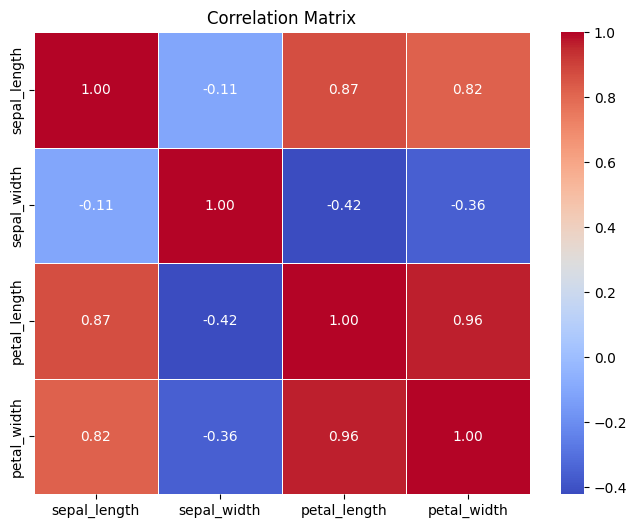

In [6]:
correlation_matrix = data.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

The heatmap visually represents the correlation between each pair of features. Values close to 1 indicate a strong positive correlation, values close to -1 indicate a strong negative correlation, and values close to 0 indicate little to no correlation. This can provide insights into which features are more or less correlated with each other in the dataset.

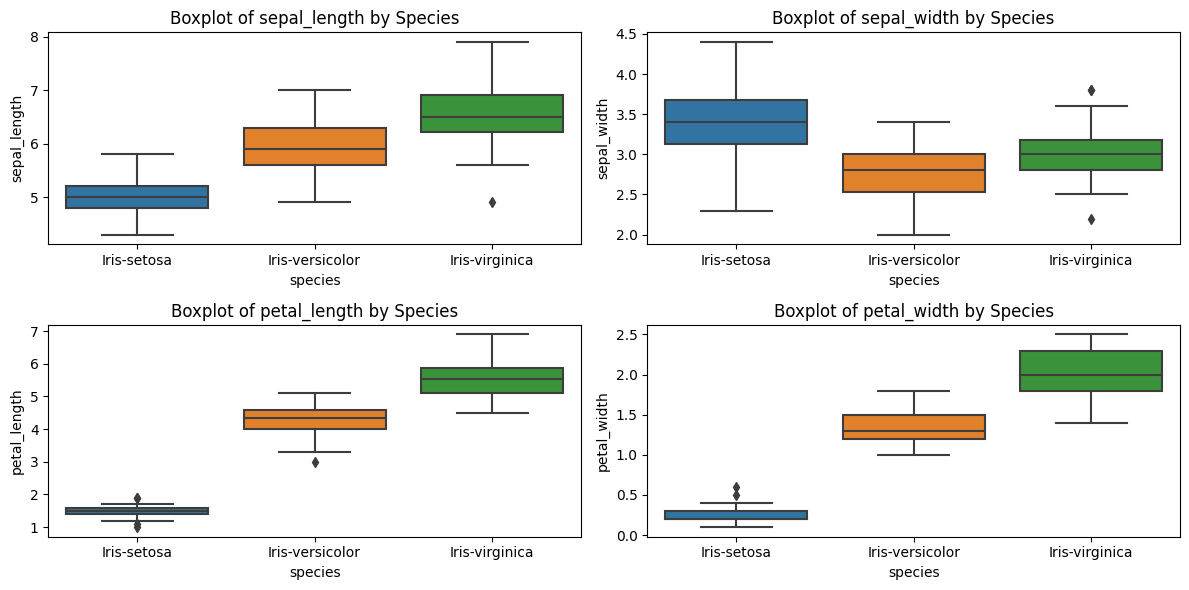

In [21]:
plt.figure(figsize=(12, 6))
for i, feature in enumerate(['sepal_length', 'sepal_width', 'petal_length', 'petal_width']):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='species', y=feature, data=data)
    plt.title(f'Boxplot of {feature} by Species')
plt.tight_layout()
plt.show()

Split the data into training and testing data

In [7]:
X=data.drop('species', axis=1)
y=data['species']

Training and testing data are split in 80:20 ratio

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision tree classifier is used

In [9]:
clf = DecisionTreeClassifier(random_state=42)

In [10]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [11]:
y_pred = clf.predict(X_test)

In [12]:
accuracy = accuracy_score(y_test, y_pred)
accuracy


1.0

An accuracy score of 1.00 (or 100%) indicates that all predictions made by the model are correct. This is the highest possible accuracy score, suggesting that the model has successfully classified all instances in the dataset without making any mistakes.

In [13]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [14]:
class_report = classification_report(y_test, y_pred)
class_report

'                 precision    recall  f1-score   support\n\n    Iris-setosa       1.00      1.00      1.00        10\nIris-versicolor       1.00      1.00      1.00         9\n Iris-virginica       1.00      1.00      1.00        11\n\n       accuracy                           1.00        30\n      macro avg       1.00      1.00      1.00        30\n   weighted avg       1.00      1.00      1.00        30\n'

In [15]:
print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 1.00
Confusion Matrix:
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      1.00      1.00         9
 Iris-virginica       1.00      1.00      1.00        11

       accuracy                           1.00        30
      macro avg       1.00      1.00      1.00        30
   weighted avg       1.00      1.00      1.00        30



Decision tree model is used here that can classify iris flowers into different species based on their sepal and petal
measurements.